# Zapojení elektrod

Pro správné měření svalové aktivity bicepsu (konkrétně *biceps brachii*) pomocí EMG elektrody jsem elektrody umístit takto:

## 1. Aktivní elektrody (měřící) – 2 ks

- **Umístění**: Na břicho svalu (*muscle belly*) – tedy zhruba uprostřed mezi loktem a ramenem.  
- **Směr**: Podél směru svalových vláken (tedy podélně s pažní kostí).  
- **Rozestup**: Cca 2 cm od sebe.

## 2. Referenční elektroda (uzemnění) – 1 ks

- **Umístění**: Na kostnaté nebo „elektricky klidné“ místo, např.:
  - Loketní výběžek (*olecranon*)
  - Zápěstí
  - Nebo jiný neaktivní sval blízko měřeného místa (např. rameno)

Ukázka umístění elektrod je na obrázku níže.

![Umístění elektrod pro měření EMG](./imgs/20250330_135622520_iOS.jpg)

Úhel fotky trochu zkresluje, ale elektrody jsou umístěny správně.

# Signál v klidovém stavu ruky


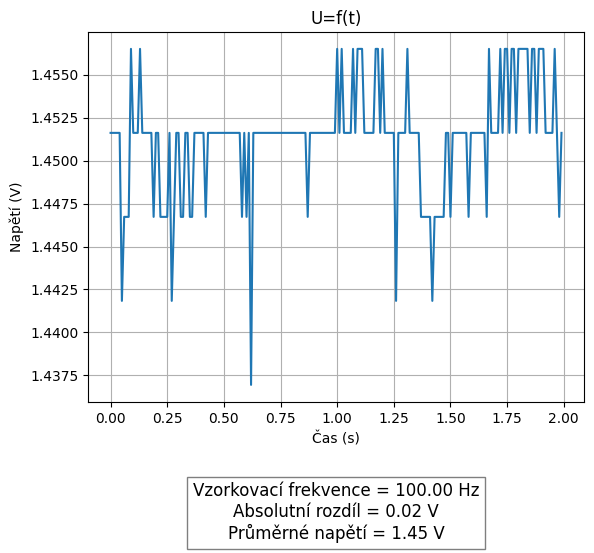

In [3]:
import numpy as np
import matplotlib.pyplot as plt

file = './data/klidový_stav.csv'

data = np.loadtxt(file, delimiter=',', dtype=float, skiprows=1)
header = np.loadtxt(file, delimiter=',', max_rows=1, dtype=str)

time = data[:, 0]
voltage = (data[:, 1] * 5) / 1023

dt = time[1] - time[0]

num_samples = len(time)

sampling_frequency = 1 / dt

average_voltage = np.mean(voltage)

plt.plot(time, voltage)
plt.title('U=f(t)')
plt.xlabel('Čas (s)')
plt.ylabel('Napětí (V)')
plt.grid()
plt.text(
    0.5,
    -0.3,
    f"Vzorkovací frekvence = {sampling_frequency:.2f} Hz\nAbsolutní rozdíl = {np.abs(np.max(voltage) - np.min(voltage)):.2f} V\nPrůměrné napětí = {average_voltage:.2f} V",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.show()

# Impulzní charakteristika

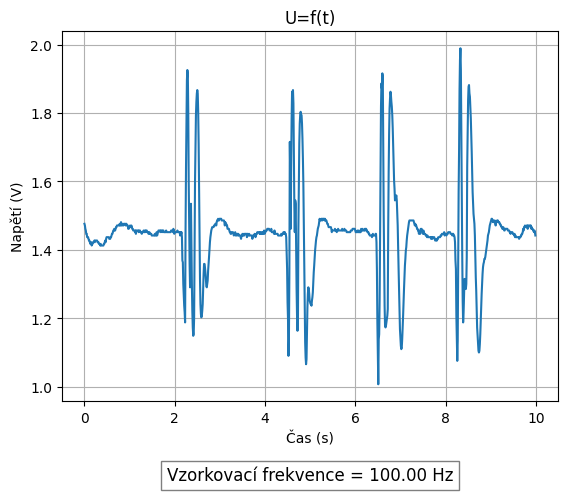

In [41]:
import numpy as np
import matplotlib.pyplot as plt

file = "./data/impulzní_char.csv"

data = np.loadtxt(file, delimiter=",", dtype=float, skiprows=1)
header = np.loadtxt(file, delimiter=",", max_rows=1, dtype=str)

time = data[:, 0]
voltage = (data[:, 1] * 5) / 1023

dt = time[1] - time[0]

num_samples = len(time)

sampling_frequency = 1 / dt

plt.plot(time, voltage)
plt.title("U=f(t)")
plt.xlabel("Čas (s)")
plt.ylabel("Napětí (V)")
plt.grid()
plt.text(
    0.5,
    -0.2,
    f"Vzorkovací frekvence = {sampling_frequency:.2f} Hz",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.show()

## Detailnější pohled na jednu impulzní charakteristiku

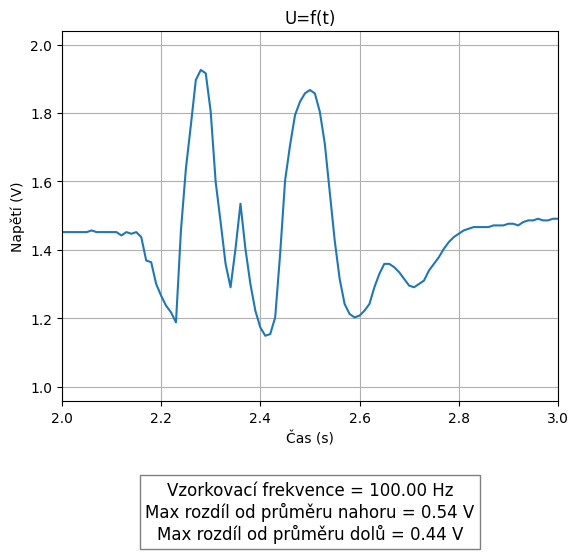

In [45]:
up_difference_from_average = np.abs(np.max(voltage) - average_voltage)
down_difference_from_average = np.abs(np.min(voltage) - average_voltage)
plt.xlim(2, 3)
plt.plot(time, voltage)
plt.title("U=f(t)")
plt.xlabel("Čas (s)")
plt.ylabel("Napětí (V)")
plt.grid()
plt.text(
    0.5,
    -0.3,
    f"Vzorkovací frekvence = {sampling_frequency:.2f} Hz\nMax rozdíl od průměru nahoru = {up_difference_from_average:.2f} V\nMax rozdíl od průměru dolů = {down_difference_from_average:.2f} V",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.show()

Jedna možnost ovládání robota by mohla být založena na impulzní charakteristice. Jeden impulz by znamenal začátek pohybu, druhý impulz by znamenal konec pohybu.

# Přechodová charakteristika

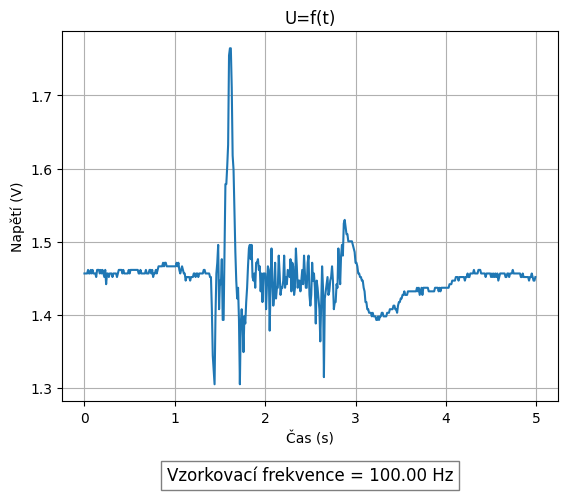

In [48]:
import numpy as np
import matplotlib.pyplot as plt

file = "./data/přechodová_char.csv"

data = np.loadtxt(file, delimiter=",", dtype=float, skiprows=1)
header = np.loadtxt(file, delimiter=",", max_rows=1, dtype=str)

time = data[:, 0]
voltage = (data[:, 1] * 5) / 1023

dt = time[1] - time[0]

num_samples = len(time)

sampling_frequency = 1 / dt

plt.plot(time, voltage)
plt.title("U=f(t)")
plt.xlabel("Čas (s)")
plt.ylabel("Napětí (V)")
plt.grid()
plt.text(
    0.5,
    -0.2,
    f"Vzorkovací frekvence = {sampling_frequency:.2f} Hz",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.show()

Druhá možnost ovládání robota by mohla být založena na přechodové charakteristice. Dala by se identifikovat vyšší úroveň šumu než v klidovém stavu. V tomto případě by se robot pohyboval, dokud by byl signál nad určitou prahovou hodnotou. Šum by se také krom absolutní hotnoty napětí dal indentifikovat i podle rychlosti změny napětí.

# Aktivace jiného svalu

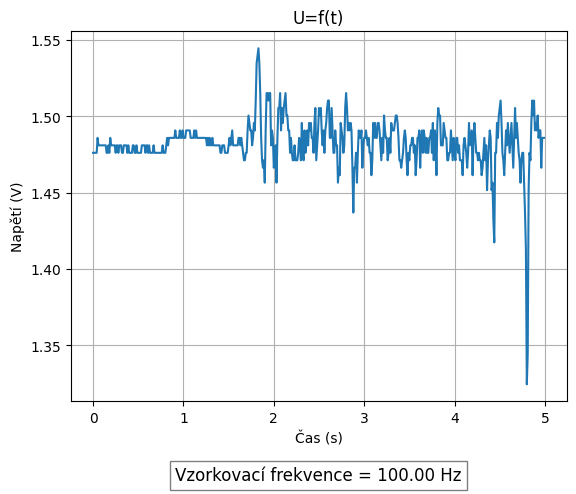

In [49]:
import numpy as np
import matplotlib.pyplot as plt

file = "./data/zatnutí_tricepsu.csv"

data = np.loadtxt(file, delimiter=",", dtype=float, skiprows=1)
header = np.loadtxt(file, delimiter=",", max_rows=1, dtype=str)

time = data[:, 0]
voltage = (data[:, 1] * 5) / 1023

dt = time[1] - time[0]

num_samples = len(time)

sampling_frequency = 1 / dt

plt.plot(time, voltage)
plt.title("U=f(t)")
plt.xlabel("Čas (s)")
plt.ylabel("Napětí (V)")
plt.grid()
plt.text(
    0.5,
    -0.2,
    f"Vzorkovací frekvence = {sampling_frequency:.2f} Hz",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.show()

V čase zhruba 1,5 sekundy je vidět aktivace jiného svalu, v tomto případě se jedná o triceps. Aktivace tricepsu by se teoreticky dala zaměnit za aktivaci bicepsu. Což by znamenalo, že každá elektroda by měla být na jiné části těla, aby se předešlo záměně. Případně by se dalo použít ovládání pomocí impulzní charakteristiky.

# Pohyb ruky bez zatínání

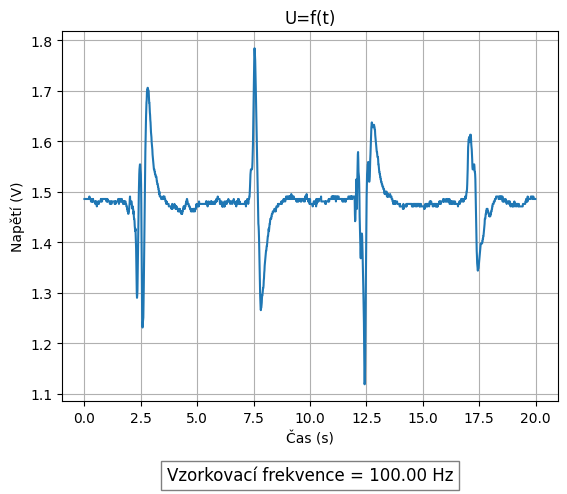

In [54]:
import numpy as np
import matplotlib.pyplot as plt

file = "./data/pohyb_ruky_prvni_k_sobe.csv"

data = np.loadtxt(file, delimiter=",", dtype=float, skiprows=1)
header = np.loadtxt(file, delimiter=",", max_rows=1, dtype=str)

time = data[:, 0]
voltage = (data[:, 1] * 5) / 1023

dt = time[1] - time[0]

num_samples = len(time)

sampling_frequency = 1 / dt

plt.plot(time, voltage)
plt.title("U=f(t)")
plt.xlabel("Čas (s)")
plt.ylabel("Napětí (V)")
plt.grid()
plt.text(
    0.5,
    -0.2,
    f"Vzorkovací frekvence = {sampling_frequency:.2f} Hz",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.show()

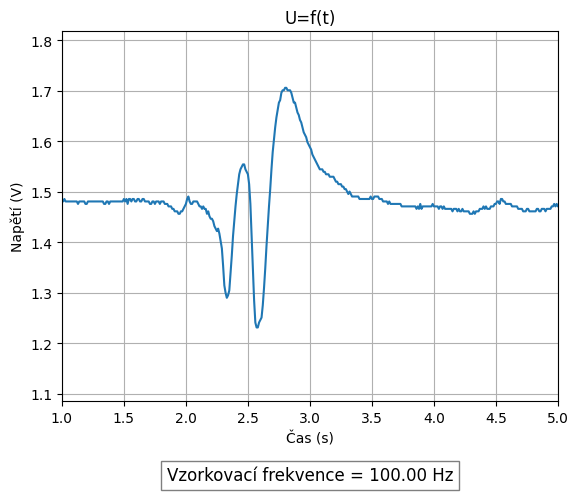

In [53]:
# limit plot from 2 to 5
plt.xlim(1, 5)
plt.plot(time, voltage)
plt.title("U=f(t)")
plt.xlabel("Čas (s)")
plt.ylabel("Napětí (V)")
plt.grid()
plt.text(
    0.5,
    -0.2,
    f"Vzorkovací frekvence = {sampling_frequency:.2f} Hz",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.show()

Tento graf je velmi podobný impulzní charakteristice. To by mohlo znamenat, že je možné ovládat robota i bez zatínání bicepsu. Z tvaru křivky se nedá poznat, zda se ruka pohybude k rameni nebo od něj.

# Šum

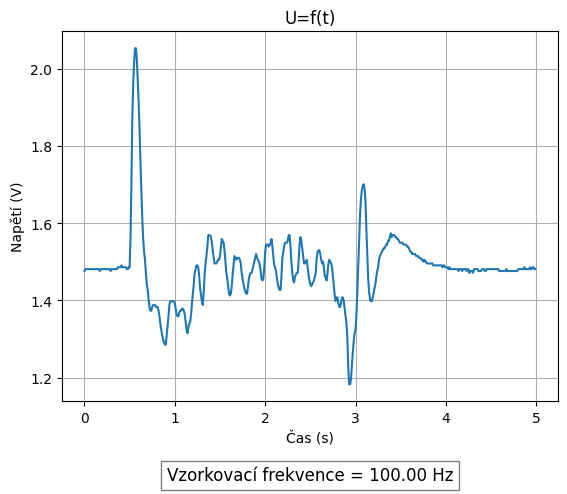

In [55]:
import numpy as np
import matplotlib.pyplot as plt

file = "./data/hýbání_kabely.csv"

data = np.loadtxt(file, delimiter=",", dtype=float, skiprows=1)
header = np.loadtxt(file, delimiter=",", max_rows=1, dtype=str)

time = data[:, 0]
voltage = (data[:, 1] * 5) / 1023

dt = time[1] - time[0]

num_samples = len(time)

sampling_frequency = 1 / dt

plt.plot(time, voltage)
plt.title("U=f(t)")
plt.xlabel("Čas (s)")
plt.ylabel("Napětí (V)")
plt.grid()
plt.text(
    0.5,
    -0.2,
    f"Vzorkovací frekvence = {sampling_frequency:.2f} Hz",
    horizontalalignment="center",
    verticalalignment="center",
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(facecolor="white", alpha=0.5),
)
plt.show()

Hýbání kabelů způsobuje velký šum. Je dobré mít kabely co nejvíce zafixované, aby se minimalizoval pohyb kabelů. Aby se robot mohl ovládat pomocí velikosti napětí z přechodové charakteristiky nesměl by se pohybovat. Jinak by se mohlo stát, že by se robot pohyboval i bez zatínání bicepsu.

# Závěr
Přijde mi nejlepší řízení robota řešit pomocí impulzní charakteristiky. Vzhledem k tomu, že se jedná o krátkodobý signál, je možné ho použít i v případě, že by se ruka pohybovala.

Samotná logika ovládání by mohla být následující:
- Pokud se zaznamená impuls, robot se začne pohybovat v předem stanovené ose.
- Pokud se zaznamená druhý impuls, robot se zastaví.
- Pokud se zaznamená třetí impuls, robot se začne pohybovat v opačném směru.
- Pokud se zaznamená čtvrtý impuls, robot se zastaví.



Případně druhá varianta:
- Pokud se zaznamená impuls, robot se začne pohybovat v předem stanovené ose.
- Pokud se zaznamená druhý impuls, robot se zastaví a po chvíli se začne pohybovat na pozici 0 v ose.

V obou případech by měl robot nastavené nějaký rozsah souřadnic, ve kterém se může pohybovat